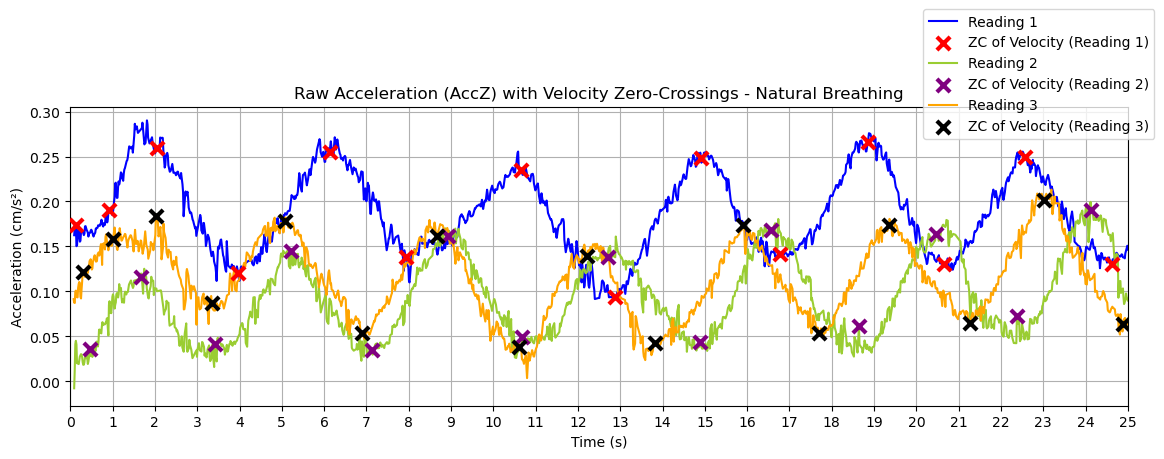

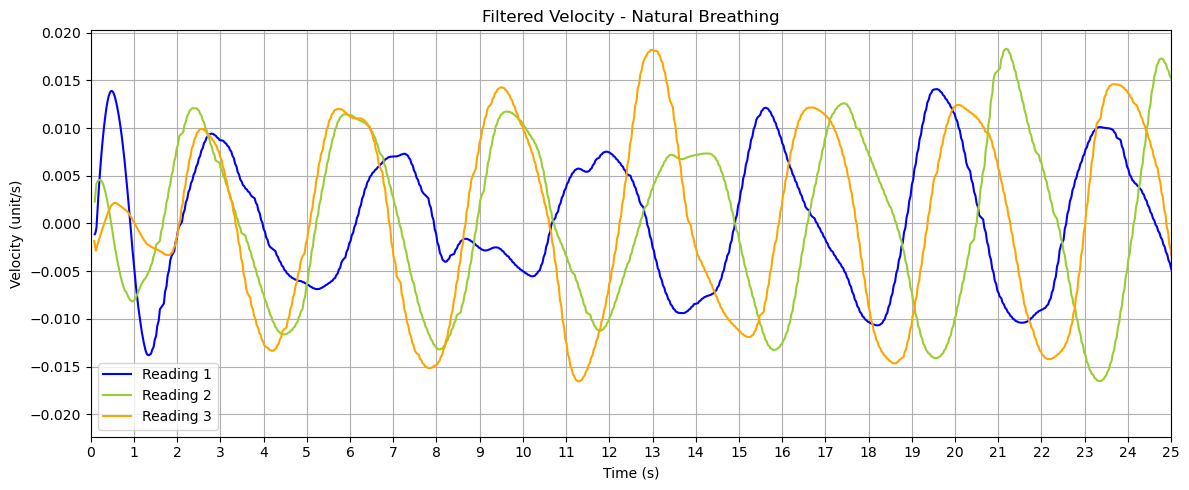

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Filenames of your 3 datasets
file_paths = [
    "chest_motion_data_ble_timer_01(complete_natural).csv",
    "chest_motion_data_ble_timer_02(complete_natural).csv",
    "chest_motion_data_ble_timer_03(complete_natural).csv"
]

# Colors for lines and contrasting colors for zero-crossing markers
colors = ["blue", "yellowgreen", "orange"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filtering functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Zero-crossing detection (from velocity)
def detect_zero_crossings(signal, time):
    sign_changes = np.diff(np.sign(signal))
    zero_indices = np.where(sign_changes != 0)[0]
    zero_times = time[zero_indices]
    return zero_times

# Storage
acc_data = []
vel_data = []
time_data = []

# Load and process data
for path in file_paths:
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    acc_data.append(acc)
    vel_data.append(velocity)
    time_data.append(time)

# Plot Acceleration with Velocity Zero-Crossings
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], acc_data[i], label=labels[i], color=colors[i])
    zc_times = detect_zero_crossings(vel_data[i], time_data[i])
    acc_at_zc = np.interp(zc_times, time_data[i], acc_data[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")
plt.title("Raw Acceleration (AccZ) with Velocity Zero-Crossings - Natural Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot Velocity (no ZC)
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], vel_data[i], label=labels[i], color=colors[i])
plt.title("Filtered Velocity - Natural Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


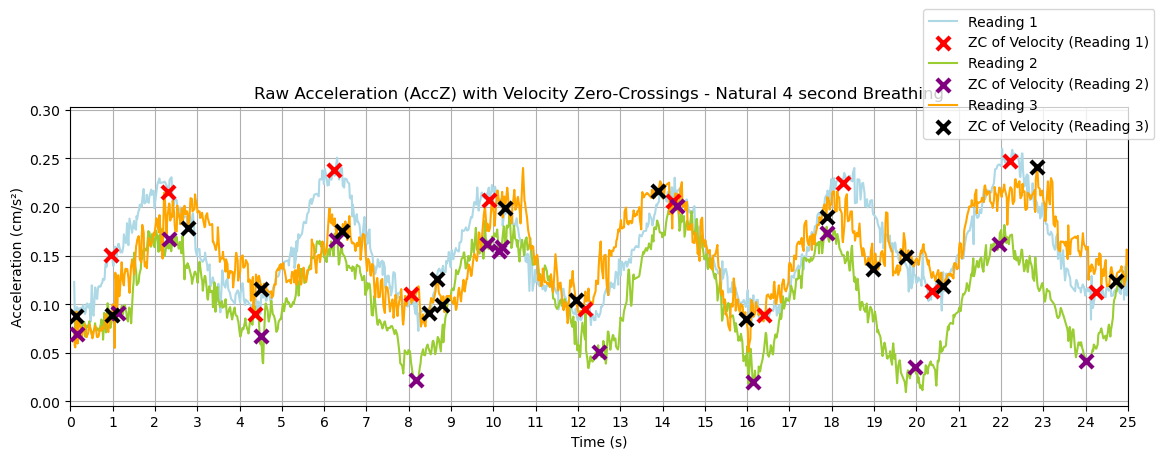

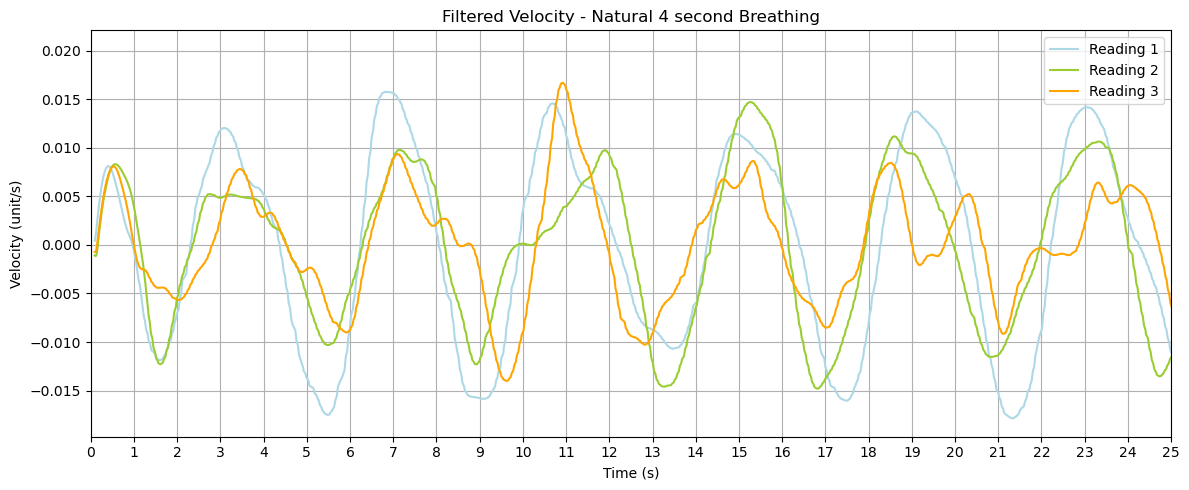

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Filenames of your 3 datasets
file_paths = [
    "chest_motion_data_ble_timer_01(natural_4_second).csv",
    "chest_motion_data_ble_timer_02(natural_4_second).csv",
    "chest_motion_data_ble_timer_03(natural_4_second).csv"
]

# Colors for lines and contrasting colors for zero-crossing markers
colors = ["lightblue", "yellowgreen", "orange"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filtering functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Zero-crossing detection (from velocity)
def detect_zero_crossings(signal, time):
    sign_changes = np.diff(np.sign(signal))
    zero_indices = np.where(sign_changes != 0)[0]
    zero_times = time[zero_indices]
    return zero_times

# Storage
acc_data = []
vel_data = []
time_data = []

# Load and process data
for path in file_paths:
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    acc_data.append(acc)
    vel_data.append(velocity)
    time_data.append(time)

# Plot Acceleration with Velocity Zero-Crossings
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], acc_data[i], label=labels[i], color=colors[i])
    zc_times = detect_zero_crossings(vel_data[i], time_data[i])
    acc_at_zc = np.interp(zc_times, time_data[i], acc_data[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")
plt.title("Raw Acceleration (AccZ) with Velocity Zero-Crossings - Natural 4 second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot Velocity (no ZC)
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], vel_data[i], label=labels[i], color=colors[i])
plt.title("Filtered Velocity - Natural 4 second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


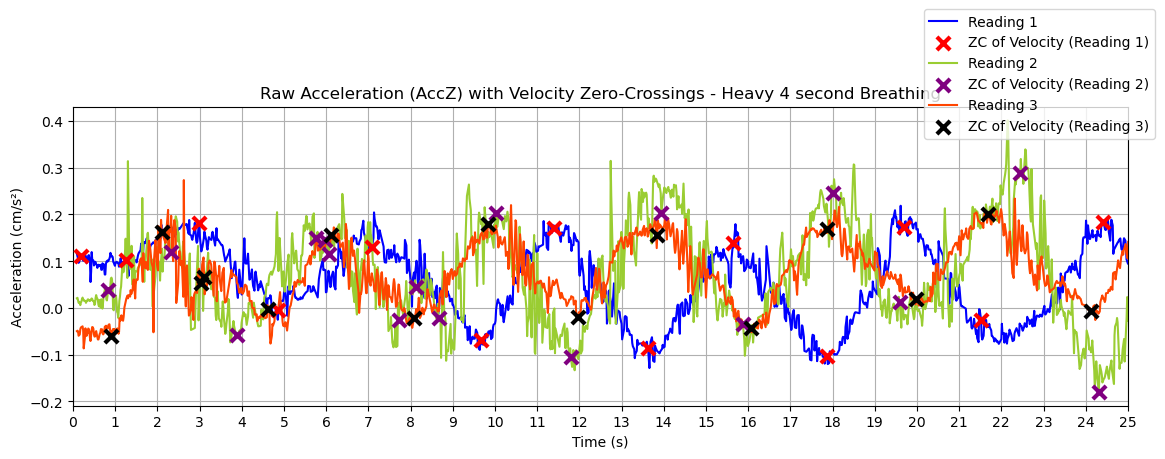

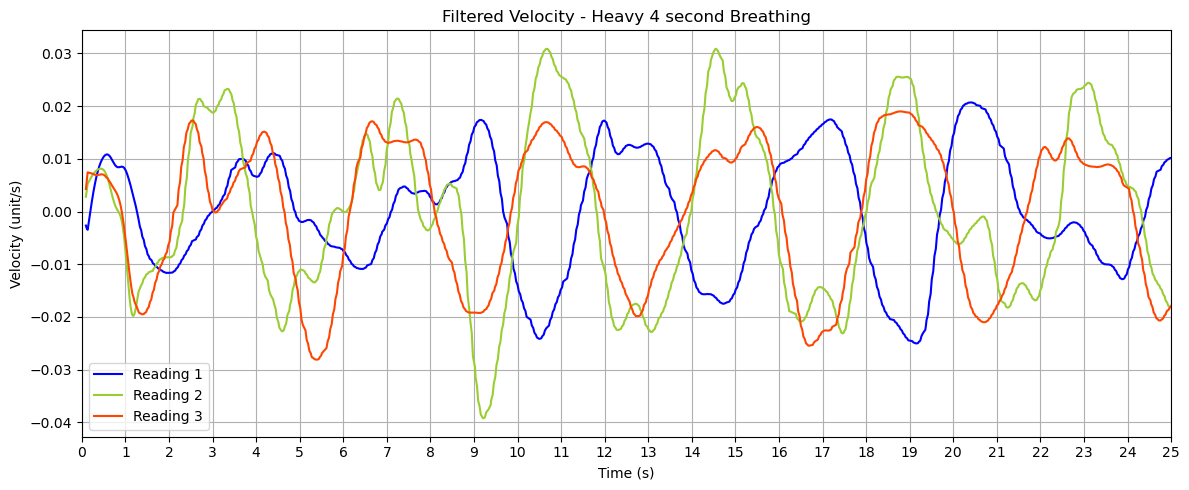

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Filenames of your 3 datasets
file_paths = [
    "chest_motion_data_ble_timer_01(heavy_4_second).csv",
    "chest_motion_data_ble_timer_02(heavy_4_second).csv",
    "chest_motion_data_ble_timer_03(heavy_4_second).csv"
]

# Colors for lines and contrasting colors for zero-crossing markers
colors = ["blue", "yellowgreen", "orangered"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filtering functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Zero-crossing detection (from velocity)
def detect_zero_crossings(signal, time):
    sign_changes = np.diff(np.sign(signal))
    zero_indices = np.where(sign_changes != 0)[0]
    zero_times = time[zero_indices]
    return zero_times

# Storage
acc_data = []
vel_data = []
time_data = []

# Load and process data
for path in file_paths:
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    acc_data.append(acc)
    vel_data.append(velocity)
    time_data.append(time)

# Plot Acceleration with Velocity Zero-Crossings
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], acc_data[i], label=labels[i], color=colors[i])
    zc_times = detect_zero_crossings(vel_data[i], time_data[i])
    acc_at_zc = np.interp(zc_times, time_data[i], acc_data[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")
plt.title("Raw Acceleration (AccZ) with Velocity Zero-Crossings - Heavy 4 second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot Velocity (no ZC)
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], vel_data[i], label=labels[i], color=colors[i])
plt.title("Filtered Velocity - Heavy 4 second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


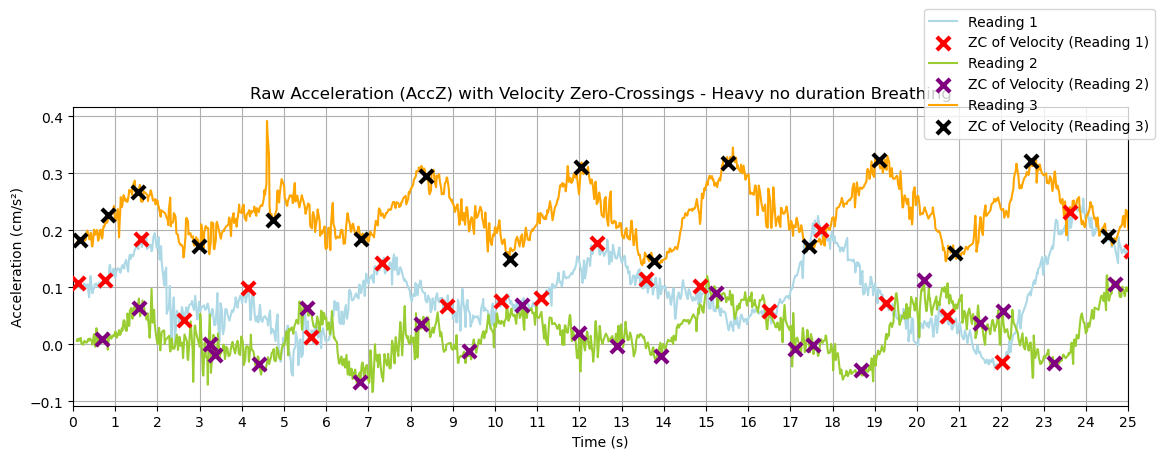

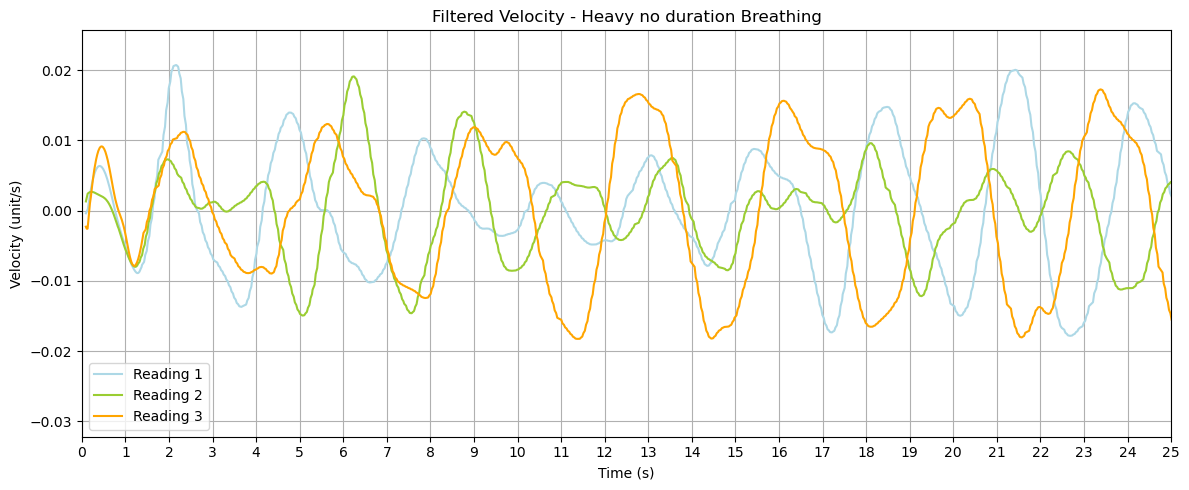

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Filenames of your 3 datasets
file_paths = [
    "chest_motion_data_ble_timer_01(heavy_no_duration).csv",
    "chest_motion_data_ble_timer_02(heavy_no_duration).csv",
    "chest_motion_data_ble_timer_03(heavy_no_duration).csv"
]

# Colors for lines and contrasting colors for zero-crossing markers
colors = ["lightblue", "yellowgreen", "orange"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filtering functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Zero-crossing detection (from velocity)
def detect_zero_crossings(signal, time):
    sign_changes = np.diff(np.sign(signal))
    zero_indices = np.where(sign_changes != 0)[0]
    zero_times = time[zero_indices]
    return zero_times

# Storage
acc_data = []
vel_data = []
time_data = []

# Load and process data
for path in file_paths:
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    acc_data.append(acc)
    vel_data.append(velocity)
    time_data.append(time)

# Plot Acceleration with Velocity Zero-Crossings
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], acc_data[i], label=labels[i], color=colors[i])
    zc_times = detect_zero_crossings(vel_data[i], time_data[i])
    acc_at_zc = np.interp(zc_times, time_data[i], acc_data[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")
plt.title("Raw Acceleration (AccZ) with Velocity Zero-Crossings - Heavy no duration Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot Velocity (no ZC)
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time_data[i], vel_data[i], label=labels[i], color=colors[i])
plt.title("Filtered Velocity - Heavy no duration Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1)) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


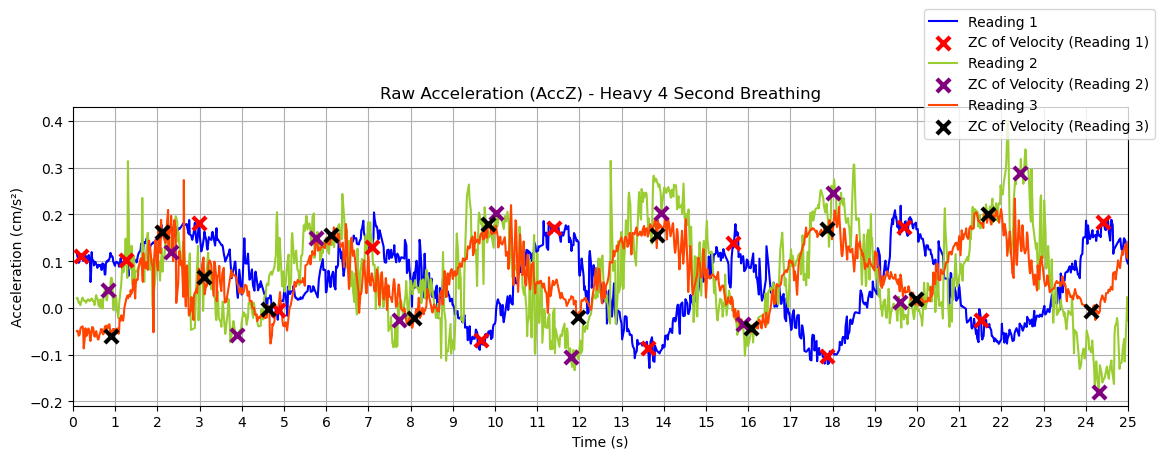

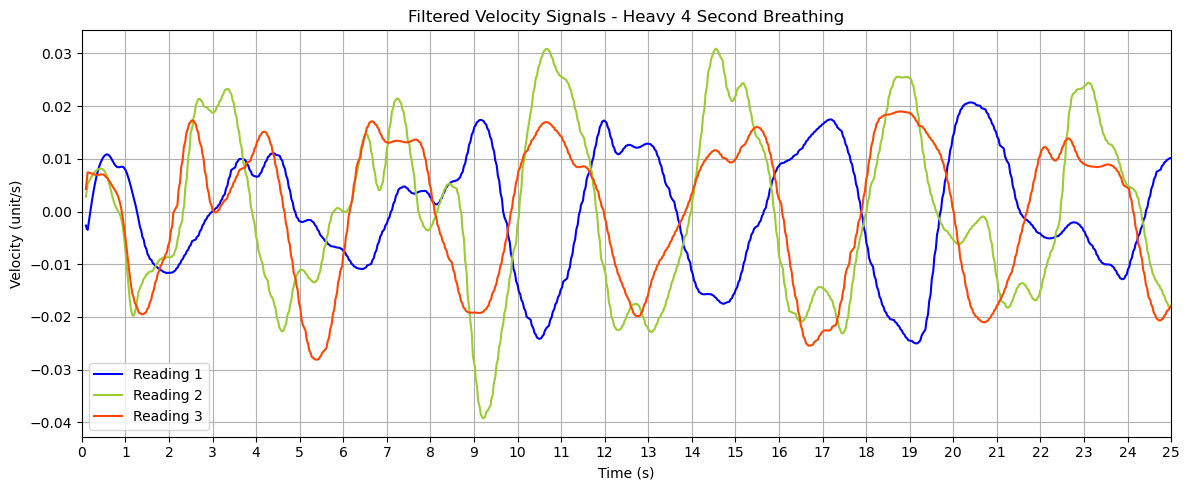

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# File paths for all datasets
file_paths = [
    "chest_motion_data_ble_timer_01(heavy_4_second).csv",
    "chest_motion_data_ble_timer_02(heavy_4_second).csv",
    "chest_motion_data_ble_timer_03(heavy_4_second).csv"
]

colors = ["blue", "yellowgreen", "orangered"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filter functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='high')
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='low')
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Zero-crossing detector with 1-second time gap filter
def detect_zero_crossings(signal, time_array, min_gap_sec=1.0):
    sign_changes = np.diff(np.sign(signal))
    zc_raw_times = time_array[np.where(sign_changes != 0)[0]]

    if len(zc_raw_times) == 0:
        return np.array([])

    filtered_zc = [zc_raw_times[0]]
    for t in zc_raw_times[1:]:
        if t - filtered_zc[-1] > min_gap_sec:
            filtered_zc.append(t)
    return np.array(filtered_zc)

# Plotting acceleration with velocity zero-crossings
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    # Process velocity
    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    # Filtered zero-crossings
    zc_times = detect_zero_crossings(velocity, time, min_gap_sec=1.0)
    acc_at_zc = np.interp(zc_times, time, acc)

    # Plot Acceleration with zero-crossings
    plt.plot(time, acc, label=labels[i], color=colors[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")

plt.title("Raw Acceleration (AccZ) - Heavy 4 Second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot velocity signals
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    plt.plot(time, velocity, label=labels[i], color=colors[i])

plt.title("Filtered Velocity Signals - Heavy 4 Second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


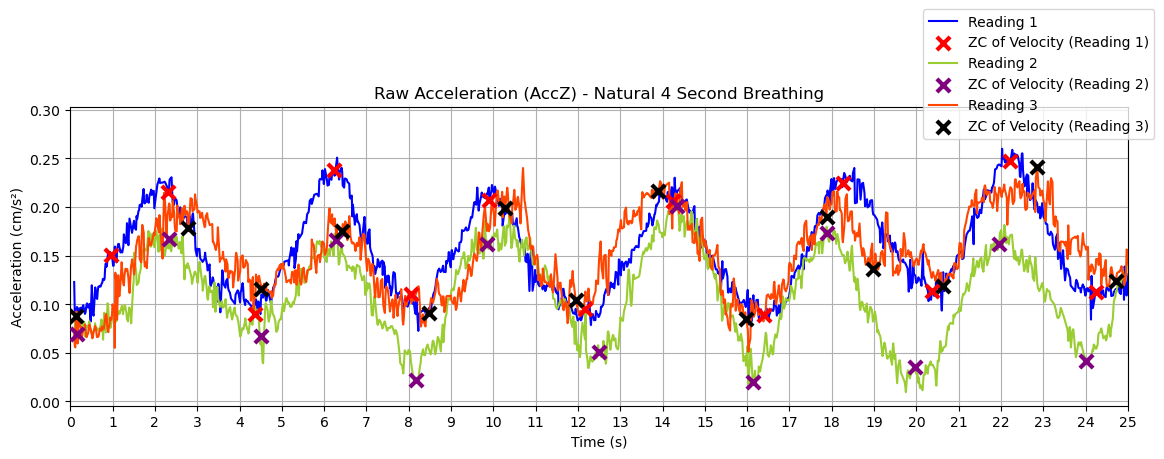

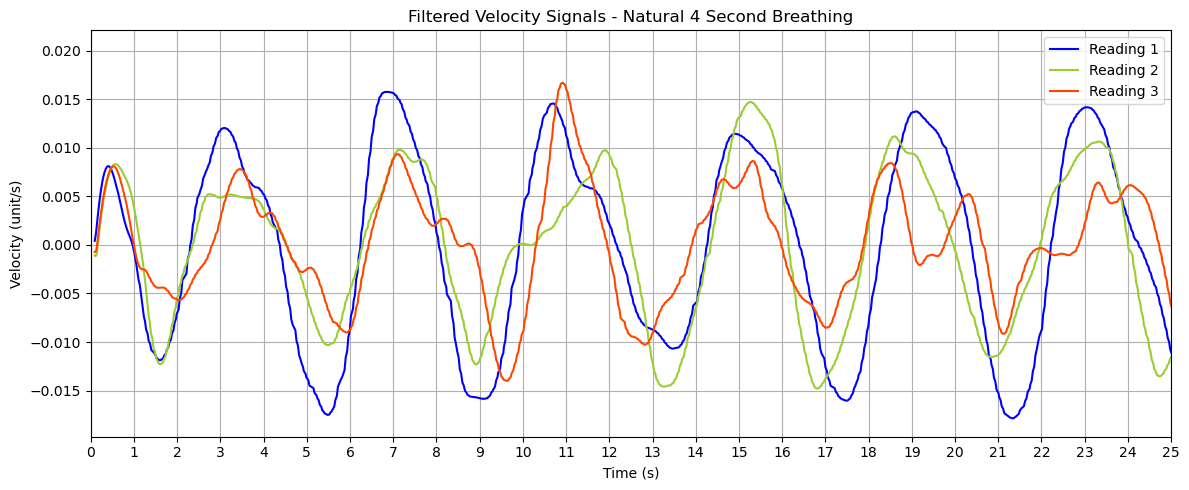

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# File paths for all datasets
file_paths = [
    "chest_motion_data_ble_timer_01(natural_4_second).csv",
    "chest_motion_data_ble_timer_02(natural_4_second).csv",
    "chest_motion_data_ble_timer_03(natural_4_second).csv"
]

colors = ["blue", "yellowgreen", "orangered"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filter functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='high')
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='low')
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Zero-crossing detector with 1-second time gap filter
def detect_zero_crossings(signal, time_array, min_gap_sec=1.0):
    sign_changes = np.diff(np.sign(signal))
    zc_raw_times = time_array[np.where(sign_changes != 0)[0]]

    if len(zc_raw_times) == 0:
        return np.array([])

    filtered_zc = [zc_raw_times[0]]
    for t in zc_raw_times[1:]:
        if t - filtered_zc[-1] > min_gap_sec:
            filtered_zc.append(t)
    return np.array(filtered_zc)

# Plotting acceleration with velocity zero-crossings
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    # Process velocity
    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    # Filtered zero-crossings
    zc_times = detect_zero_crossings(velocity, time, min_gap_sec=1.0)
    acc_at_zc = np.interp(zc_times, time, acc)

    # Plot Acceleration with zero-crossings
    plt.plot(time, acc, label=labels[i], color=colors[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")

plt.title("Raw Acceleration (AccZ) - Natural 4 Second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot velocity signals
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    plt.plot(time, velocity, label=labels[i], color=colors[i])

plt.title("Filtered Velocity Signals - Natural 4 Second Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


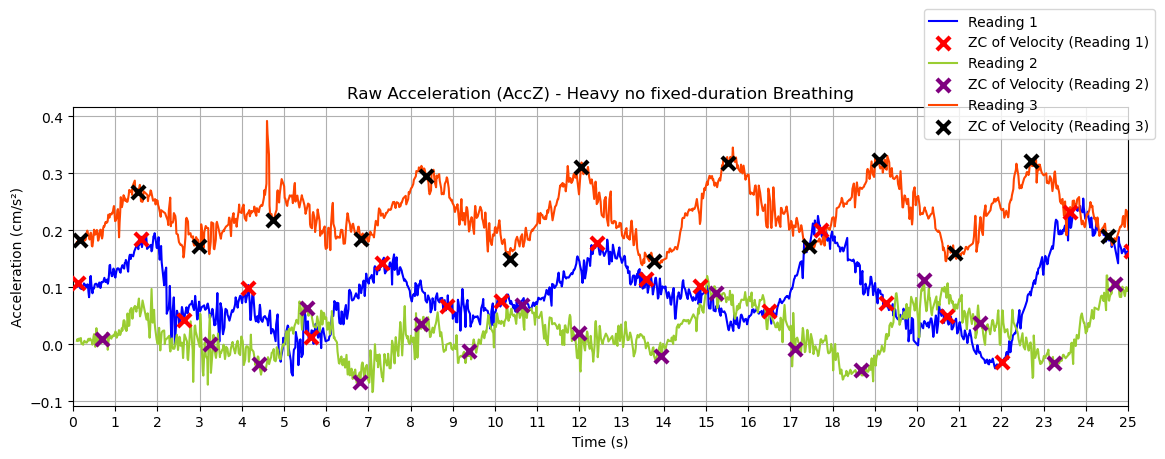

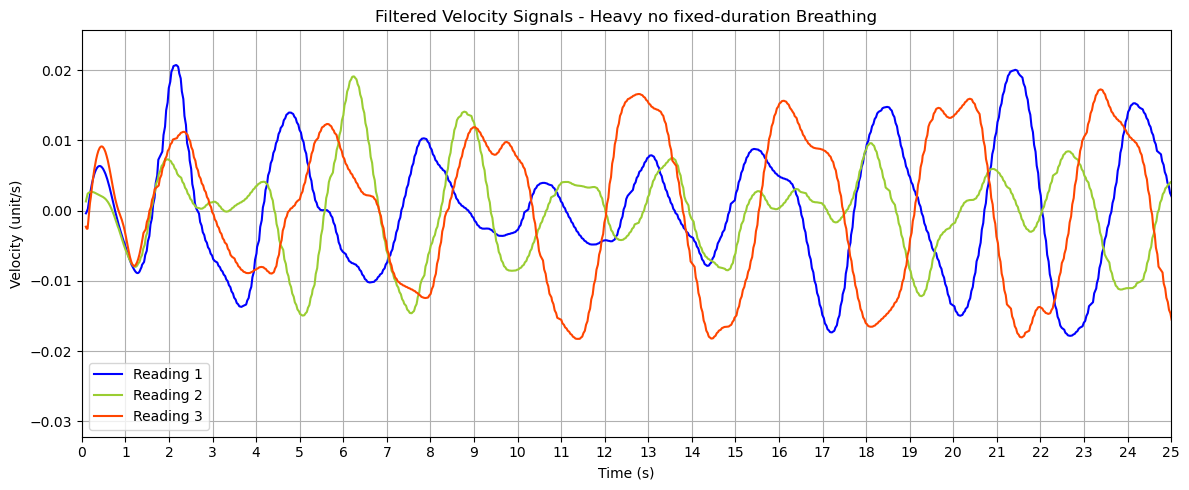

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# File paths for all datasets
file_paths = [
    "chest_motion_data_ble_timer_01(heavy_no_duration).csv",
    "chest_motion_data_ble_timer_02(heavy_no_duration).csv",
    "chest_motion_data_ble_timer_03(heavy_no_duration).csv"
]

colors = ["blue", "yellowgreen", "orangered"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filter functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='high')
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='low')
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Zero-crossing detector with 1-second time gap filter
def detect_zero_crossings(signal, time_array, min_gap_sec=1.0):
    sign_changes = np.diff(np.sign(signal))
    zc_raw_times = time_array[np.where(sign_changes != 0)[0]]

    if len(zc_raw_times) == 0:
        return np.array([])

    filtered_zc = [zc_raw_times[0]]
    for t in zc_raw_times[1:]:
        if t - filtered_zc[-1] > min_gap_sec:
            filtered_zc.append(t)
    return np.array(filtered_zc)

# Plotting acceleration with velocity zero-crossings
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    # Process velocity
    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    # Filtered zero-crossings
    zc_times = detect_zero_crossings(velocity, time, min_gap_sec=1.0)
    acc_at_zc = np.interp(zc_times, time, acc)

    # Plot Acceleration with zero-crossings
    plt.plot(time, acc, label=labels[i], color=colors[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")

plt.title("Raw Acceleration (AccZ) - Heavy no fixed-duration Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot velocity signals
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    plt.plot(time, velocity, label=labels[i], color=colors[i])

plt.title("Filtered Velocity Signals - Heavy no fixed-duration Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


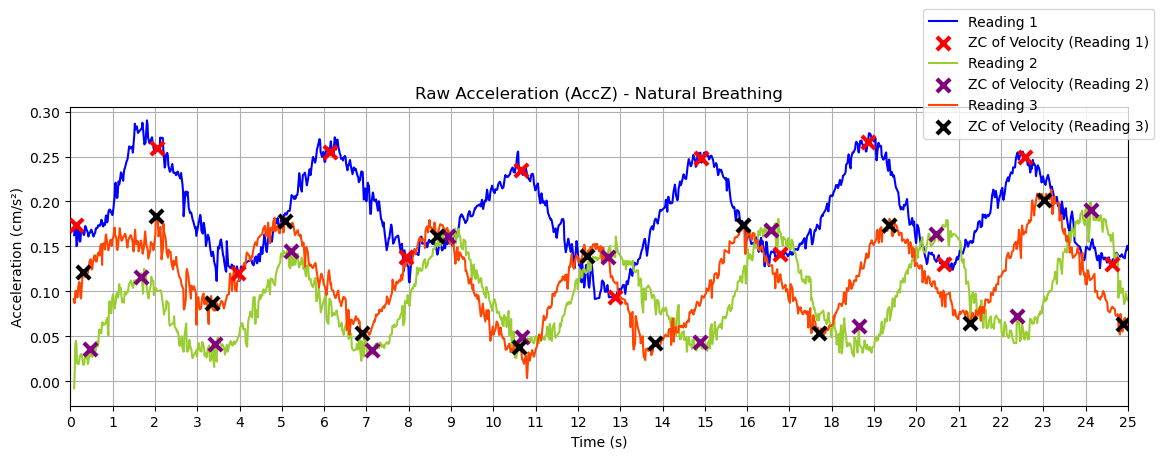

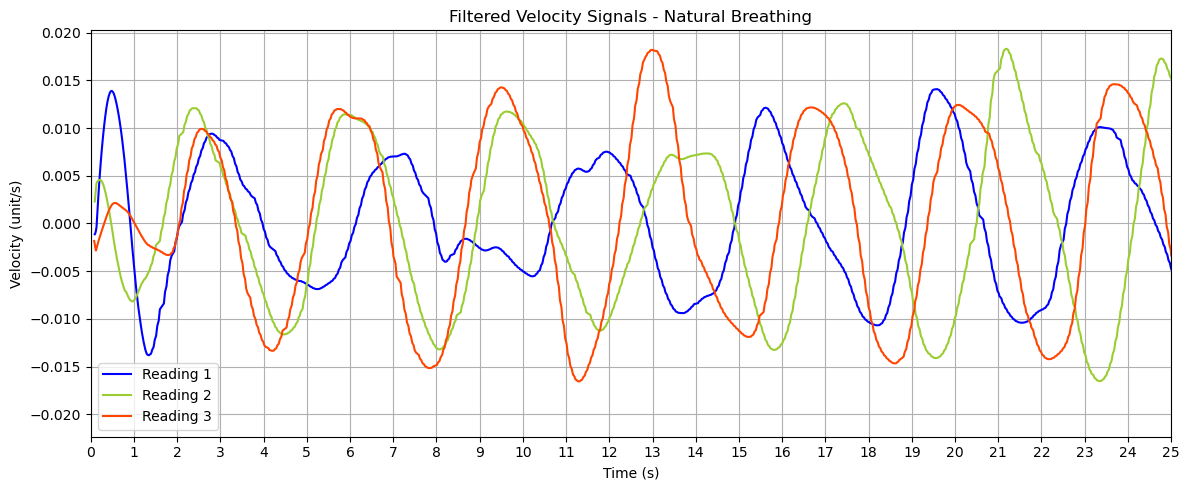

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# File paths for all datasets
file_paths = [
    "chest_motion_data_ble_timer_01(complete_natural).csv",
    "chest_motion_data_ble_timer_02(complete_natural).csv",
    "chest_motion_data_ble_timer_03(complete_natural).csv"
]

colors = ["blue", "yellowgreen", "orangered"]
zc_colors = ["red", "purple", "black"]
labels = ["Reading 1", "Reading 2", "Reading 3"]

# Filter functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='high')
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='low')
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Zero-crossing detector with 1-second time gap filter
def detect_zero_crossings(signal, time_array, min_gap_sec=1.0):
    sign_changes = np.diff(np.sign(signal))
    zc_raw_times = time_array[np.where(sign_changes != 0)[0]]

    if len(zc_raw_times) == 0:
        return np.array([])

    filtered_zc = [zc_raw_times[0]]
    for t in zc_raw_times[1:]:
        if t - filtered_zc[-1] > min_gap_sec:
            filtered_zc.append(t)
    return np.array(filtered_zc)

# Plotting acceleration with velocity zero-crossings
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    # Process velocity
    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    # Filtered zero-crossings
    zc_times = detect_zero_crossings(velocity, time, min_gap_sec=1.0)
    acc_at_zc = np.interp(zc_times, time, acc)

    # Plot Acceleration with zero-crossings
    plt.plot(time, acc, label=labels[i], color=colors[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")

plt.title("Raw Acceleration (AccZ) - Natural Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot velocity signals
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    plt.plot(time, velocity, label=labels[i], color=colors[i])

plt.title("Filtered Velocity Signals - Natural Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


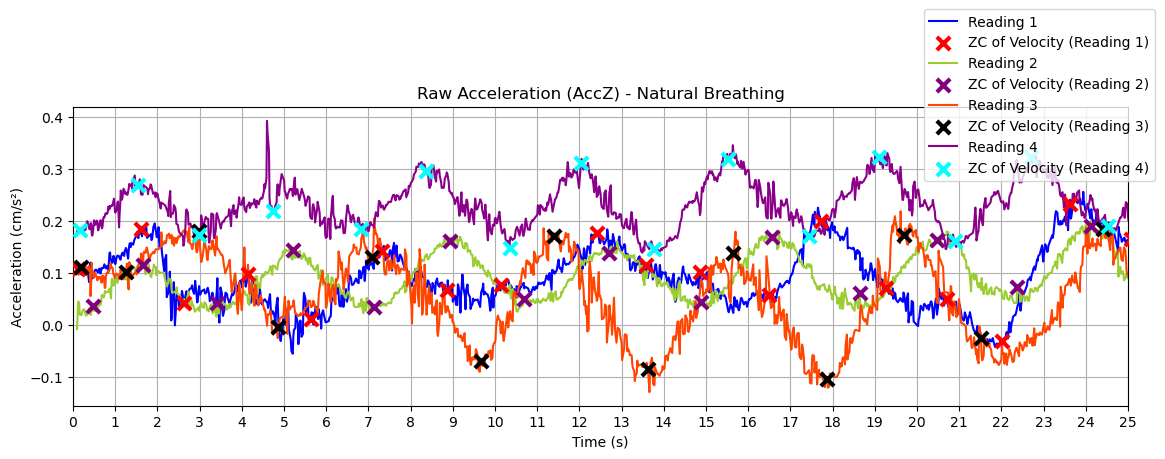

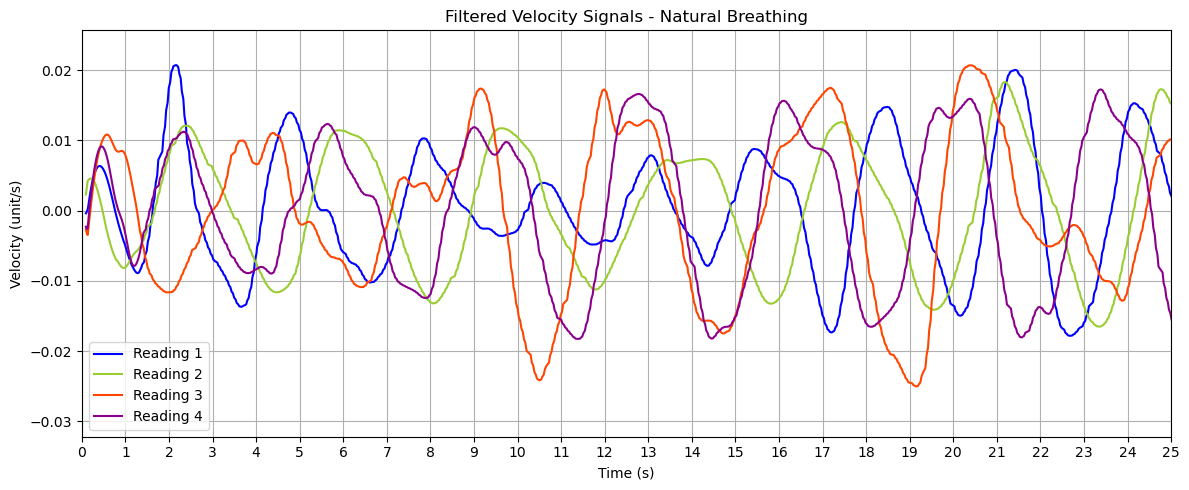

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# File paths for 4 datasets
file_paths = [
    "chest_motion_data_ble_timer_01(heavy_no_duration).csv",
    "chest_motion_data_ble_timer_02(complete_natural).csv",
    "chest_motion_data_ble_timer_01(heavy_4_second).csv",
    "chest_motion_data_ble_timer_03(heavy_no_duration).csv"  # <- NEW FILE
]

# Colors and labels for 4 readings
colors = ["blue", "yellowgreen", "orangered", "darkmagenta"]
zc_colors = ["red", "purple", "black", "cyan"]
labels = ["Reading 1", "Reading 2", "Reading 3", "Reading 4"]

# Filter functions
def highpass_filter(data, cutoff=0.3, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='high')
    return filtfilt(b, a, data)

def lowpass_filter(data, cutoff=2.2, fs=50, order=4):
    nyquist = 0.5 * fs
    b, a = butter(order, cutoff / nyquist, btype='low')
    return filtfilt(b, a, data)

def moving_average(data, window_size=7):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Zero-crossing detector with minimum time gap
def detect_zero_crossings(signal, time_array, min_gap_sec=1.0):
    sign_changes = np.diff(np.sign(signal))
    zc_raw_times = time_array[np.where(sign_changes != 0)[0]]
    if len(zc_raw_times) == 0:
        return np.array([])
    filtered_zc = [zc_raw_times[0]]
    for t in zc_raw_times[1:]:
        if t - filtered_zc[-1] > min_gap_sec:
            filtered_zc.append(t)
    return np.array(filtered_zc)

# Plot Acceleration with velocity zero-crossings
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    zc_times = detect_zero_crossings(velocity, time, min_gap_sec=1.0)
    acc_at_zc = np.interp(zc_times, time, acc)

    plt.plot(time, acc, label=labels[i], color=colors[i])
    plt.scatter(zc_times, acc_at_zc, color=zc_colors[i], marker='x', s=90, linewidths=3,
                zorder=5, label=f"ZC of Velocity ({labels[i]})")

plt.title("Raw Acceleration (AccZ) - Natural Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (cm/s²)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1.35))
plt.tight_layout()
plt.show()

# Plot velocity signals
plt.figure(figsize=(12, 5))
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    time = df["Timestamp_sec"].values
    acc = df["AccZ"].values
    dt = np.mean(np.diff(time))

    velocity = np.cumsum(acc) * dt
    velocity = highpass_filter(velocity)
    velocity = lowpass_filter(velocity)
    velocity = moving_average(velocity)

    plt.plot(time, velocity, label=labels[i], color=colors[i])

plt.title("Filtered Velocity Signals - Natural Breathing")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (unit/s)")
plt.xlim([0, 25])
plt.xticks(np.arange(0, 26, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
